# README
**Virtuoso setup**:
- It is assumed that a Virtuoso database has been set up. (A helpful guide to set up Virtuoso on a linux computer can be found here: https://gist.github.com/seralf/8772281).
- We recommend keeping a strict naming convention for your graph names.

**About this notebook**:
- This notebook queries data from a Virtuoso database with numerous graphs using a SPARQL endpoint (in this case the local Virtuoso endpoint). 
- The results from these queries are used to calculate and plot the following metrics:
    - Density, Knowledge Degree, Vocabulary Uniqueness, Vocabulary Dynamicity, Addition Vocabulary Dynamicity, Removal Vocabulary Dynamicity, Change Ratio, Addition Change Ratio, Removal Change Ratio, Growth, Instantiated Class Ratio, Instantiated Property Ratio, Most Common Subjects, Most Common Predicates and Most Common Objects.

Things you need to do:
- If the endpoint is not the local Virtuoso endpoint the variable "endpoint" needs to be changed to the correct endpoint.
- The graphs, the versions, and their corresponding ontology files (if none then set as None) needs to be specified in "Data/notebook.csv".

# Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import visualizer as viz
import queries as que
import pywikibot
from SPARQLWrapper import SPARQLWrapper, CSV, JSON

# User defined

In [7]:
endpoint = 'http://localhost:8890/sparql'
graph_csv = pd.read_csv('Data/notebook.csv')

# Getting data, running queries and calculations

In [ ]:
graph_list = list(graph_csv.File.values)
version_list = (list(graph_csv.Version.values))
ont_list = list(graph_csv.Ont.values)
graph_name = 'Test Graph'

In [8]:
# Configure the SPARQL endpoint
sparql = SPARQLWrapper(endpoint)

# Configure the SPARQL endpoint and desired return format
sparql.setReturnFormat(JSON)

## Get basics

In [9]:
que.data_info(sparql, graph_list)

http://localhost:8890/dims completed
http://localhost:8890/35 completed


## Get structure and content

In [10]:
struc_cont = que.structure_and_content(sparql, [graph_list])

{'File': ['http://localhost:8890/dims'], 'Version': [0], 'Density': [0.000128171], 'CC': [0], 'KD': [1.94609], 'VocUni': [0.841084], 'Vdyn': [0], 'AddVdyn': [0], 'RemVdyn': [0], 'ChangeRatio': [0], 'AddCR': [0], 'RemCR': [0], 'Growth': [0]}
Doing comparisons of http://localhost:8890/dims and  http://localhost:8890/35
Starting queries
Enumerator: 8777
Denominator: 8790.0
Vdyn: 0.9985210466439135
{'File': ['http://localhost:8890/dims', 'http://localhost:8890/35'], 'Version': [0, 1], 'Density': [0.000128171, 0.00669425], 'CC': [0, 0], 'KD': [1.94609, 2.58398], 'VocUni': [0.841084, 0.388], 'Vdyn': [0, 0.9985210466439135], 'AddVdyn': [0, 0.04391353811149033], 'RemVdyn': [0, 0.9546075085324232], 'ChangeRatio': [0, 1.00064], 'AddCR': [0, 0.10001], 'RemCR': [0, 1.0], 'Growth': [0, 0.10001]}


In [11]:
struc_cont_data = pd.read_csv('structure_and_content.csv')

## Get quality

In [12]:
quality = que.quality(sparql, graph_list, ont_list)

{'File': ['http://localhost:8890/dims'], 'Version': [0], 'ICR': [0.0], 'IPR': [0.0], 'IMI': [1.0]}
{'File': ['http://localhost:8890/dims', 'http://localhost:8890/35'], 'Version': [0, 1], 'ICR': [0.0, 0.309804], 'IPR': [0.0, 0.0], 'IMI': [1.0, 1.0]}


In [13]:
quality_data = pd.read_csv('quality.csv')

## Get ipr and icr

In [14]:
que.ipcr_csv(sparql, graph_list, version_list, ont_list, name= 'ipr')
que.ipcr_csv(sparql, graph_list, version_list, ont_list, name= 'icr')

ipr
icr


# Top 3 most common
Here we count what the top 3 most common subjects, predicates and objects are for each version of the given graph. The visualization in this section show the percentage of triples in each version that include the most, 2. most or 3. most commen entities and properties respectively.

In [16]:
common_dict = que.top_entities('s', wrapper= sparql, graph_list= [graph_list], file_name= 'NotebookOutput/top_sub_.csv')
common_dict = que.top_entities('p', wrapper= sparql, graph_list= [graph_list], file_name= 'NotebookOutput/top_pre_.csv')
common_dict = que.top_entities('o', wrapper= sparql, graph_list= [graph_list], file_name= 'NotebookOutput/top_obj_.csv')

Please make sure that there are atleast 3 unique predicates


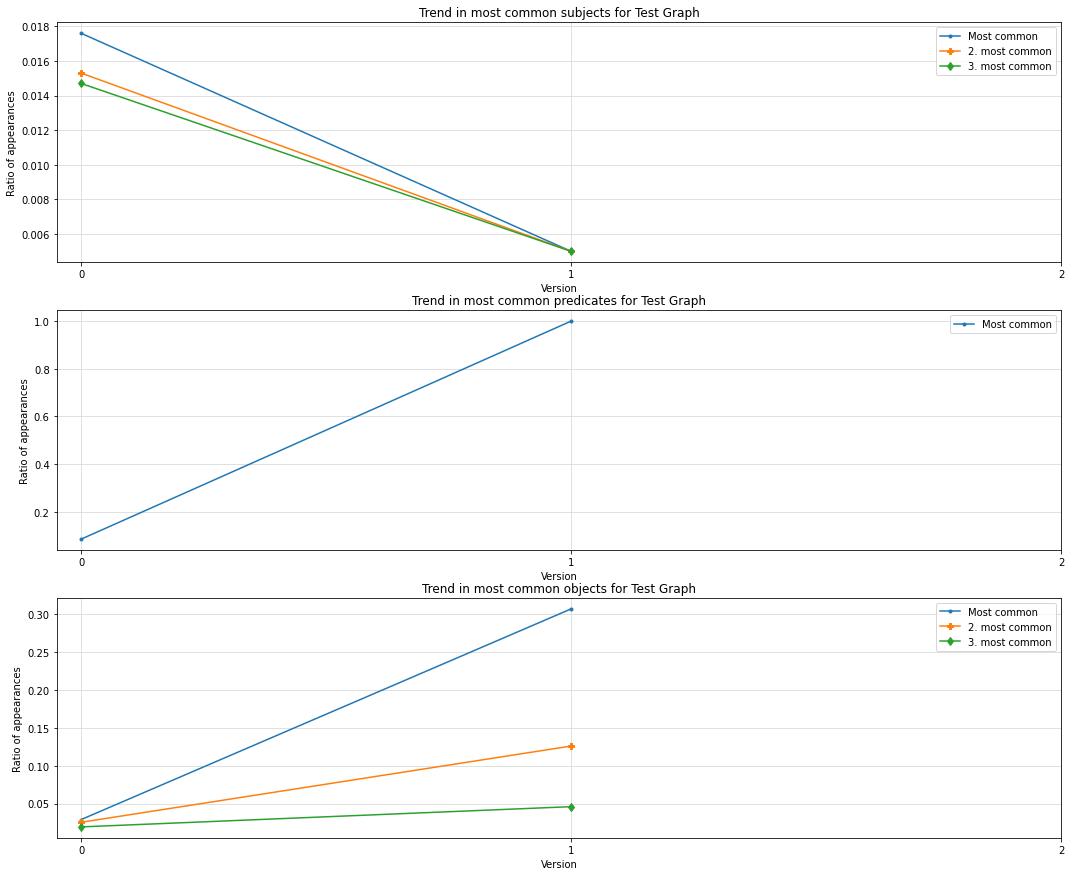

In [32]:
plt.rcParams["figure.figsize"] = [18, 15]
plt.subplot(3,1,1)
viz.top_trends('NotebookOutput/top_sub_.csv', 'basics.csv', graph_name, 'subjects', loc= 'upper right')
plt.subplot(3,1,2)
viz.top_trends('NotebookOutput/top_pre_.csv', 'basics.csv', graph_name, 'predicates', loc= 'upper right')
plt.subplot(3,1,3)
viz.top_trends('NotebookOutput/top_obj_.csv', 'basics.csv', graph_name, 'objects', loc= 'upper right')
plt.show()

# Structural measures of evolution
In this section we will analyze how the structural measures (growth ratio and density) of the graph change with each version

## Growth ratio
Given two graphs, $G_{i}$ and $G_{j}$, where $i$ and $j$ denote version number and $j>i$, the growth ratio from $G_{i}$ to $G_{i}$ is defined as
$$
growth(G_{i},G_{j})=\frac{|G_{j}|}{|G_{i}|}.
$$
With $|G_{i}|$ and $|G_{j}|$ denoting the size of the two graphs in number of triples respectively.

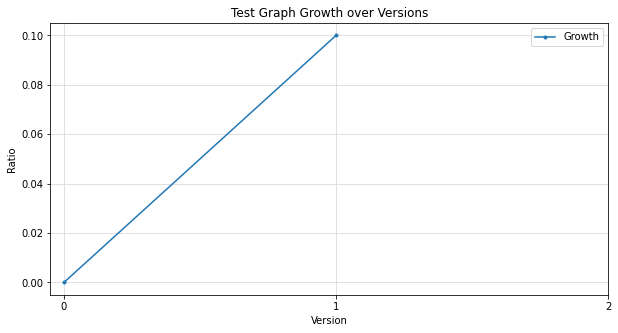

In [18]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.plot_parameters_over_versions(struc_cont_data, ['Growth'], ['.'], f"{graph_name} Growth over Versions", output_file_name= '')

## Density
Given a directed graph $G$ with edges $E$ and nodes $V$, the density, $D$, of $G$ is defined as
$$
D(G)=\frac{|E|}{|V|(|V|-1)}.
$$

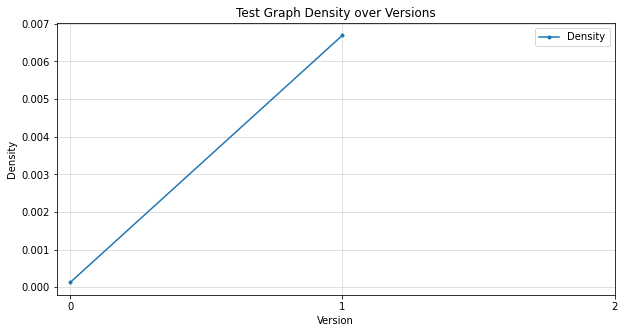

In [19]:
viz.plot_parameters_over_versions(
    struc_cont_data, ['Density'], ['.'], 
    f"{graph_name} Density over Versions", 
    output_file_name= '', y_label= 'Density')

# Measuring evolution of content
In this section we analyze how the content of the graph changes with each version. Specifically through analyzing the graphs knowledge degree, change ratio, vocabulary uniqueness and vocabulary dynamicity.

## Knowledge degree
Given a directed graph $G$, with edges $E$ and nodes $V$, for a given node $v \in V$, the knowledge degree of $v$ is defined as 
$$
K_{D}(v)=d_{o}(v).
$$

The knowledge degree for the entire graph is then defined as

$$
K_{D}(G)=\frac{\sum_{v \in V}{K_{D}(v)}}{|V|}.
$$

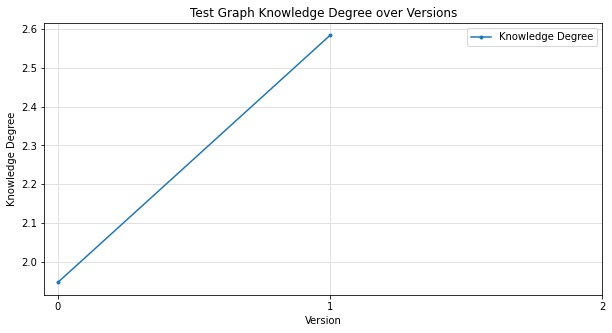

In [20]:
viz.plot_parameters_over_versions(
    struc_cont_data, ['KD'], ['.'], 
    f"{graph_name} Knowledge Degree over Versions", 
    output_file_name= '', y_label= 'Knowledge Degree')

## Change ratio
Consider two graphs, $G_{i}$ and $G_{j}$, where $i$ and $j$ denote version number and $j>i$.
Given the set of additions, $a^{+}_{i,j}$, and the set of removals, $r^{-}_{i,j}$, between the two versions of the graph, the change ratio is given by 
$$
\delta_{i,j}=\frac{|a^{+}_{i,j} \cup r^{-}_{i,j}|}{|G_{i}\cup G_{j}|}.
$$

Additionally, the insertion ratio, $\delta_{i,j}^{+}$, and deletion ratio, $\delta_{i,j}^{-}$, are defined by

$$
\delta^{+}_{i,j}=\frac{|a^{+}_{i,j}|}{|G_{i}|},
$$

$$
\delta^{-}_{i,j}=\frac{|r^{-}_{i,j}|}{|G_{i}|}.
$$

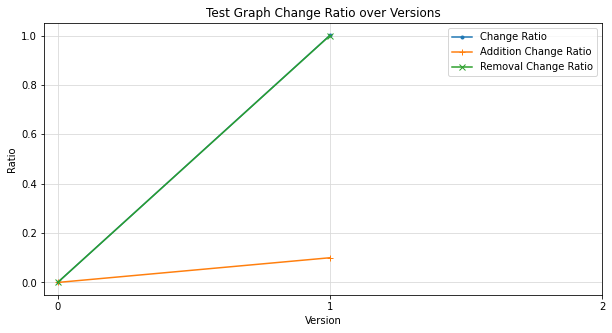

In [21]:
viz.plot_parameters_over_versions(
    struc_cont_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'], 
    f"{graph_name} Change Ratio over Versions", 
    output_file_name= '')

## Vocabulary
For a version of a knowledge graph, $G_{i}$, the vocabulary set is the set of all unique subjects, $S_{G_{i}}$, predicates, $P_{G_{i}}$, and objects, $O_{G_{i}}$ in the knowledge graph.
The vocabulary set of $G_{i}$ is denoted $K(G_{i})$ and mathematically expressed as
$$
K(G_{i})=\{S_{G_{i}} \cup P_{G_{i}} \cup O_{G_{i}}\}.
$$

### Vocabulary uniqueness
Given a knowledge graph $G_{i}$ with the vocabulary set $K(G_{i})$, then the vocabulary uniqueness of $G_{i}$ is defined as
$$
\Psi(G_{i}) =\frac{|K(G_{i})|}{|G_{i}|}.
$$

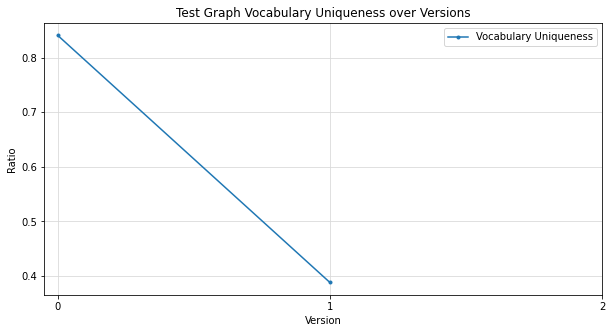

In [22]:
viz.plot_parameters_over_versions(
    struc_cont_data, ['VocUni'], ['.'], 
    f"{graph_name} Vocabulary Uniqueness over Versions", 
    output_file_name= '')

### Vocabulary dynamicity
Given two versions of a knowledge graph, $G_{i}$ and $G_{j}$ with vocabulary sets $V(G_{i})$ and $V(G_{j})$ respectively, where $j>i$.
The vocabulary dynamicity is defined as
$$
vdyn_{i,j} = \frac{|(K(G_{i})\backslash K(G_{j})) \cup (K(G_{j})\backslash K(G_{i}))|}{|K(G_{i}) \cup K(G_{j})|}.
$$

Furthermore, the vocuabulary dynamicity for additions and removals are defined as

$$
vdyn^{+}_{i,j} = \frac{|(K(G_{j})\backslash K(G_{i}))|}{|K(G_{i}) \cup K(G_{j})|},
$$

$$
vdyn^{-}_{i,j} = \frac{|(K(G_{i})\backslash K(G_{j}))|}{|K(G_{i}) \cup V(G_{j})|}.
$$

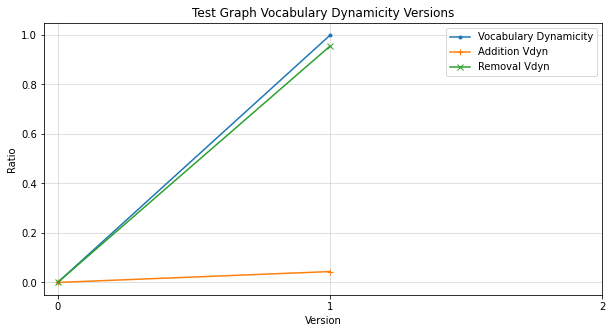

In [23]:
viz.plot_parameters_over_versions(
    struc_cont_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'], 
    f"{graph_name} Vocabulary Dynamicity Versions", 
    output_file_name= '')

# Measuring quality between versions
- **Instantiated class ratio**:
Given a knowledge graph $G_{i}$ and ontology $Ont(G_{i})$, consider $CL(Ont(G_{i}))$ the set of classes of the ontology and $ICL(Ont(G_{i}))$ the set of instantiated classes of the ontology.
The instantiated class ratio of $G_{i}$ is then defined as
$$
ICR(G_{i}) = \frac{|ICL(Ont(G_{i}))|}{|CL(Ont(G_{i}))|}.
$$

- **Instantiated property ratio**:
Given a knowledge graph $G_{i}$ and ontology $Ont(G_{i}))$, consider $P(Ont(G_{i}))$ the set of properties of the ontology and $IP(Ont(G_{i}))$ the set of instantiated properties of the ontology.
The instantiated property ratio of $G_{i}$ is then defined as
$$
IPR(G_{i}) = \frac{|IP(Ont(G_{i}))|}{|P(Ont(G_{i}))|}.
$$

- **Inverse multiple inheritance number**:
Given a knowledge graph $G_{i}$ and ontology $Ont(G_{i})$, consider $\Lambda(cl_{i})$ the set of superclasses of the class $cl_{i}$ and $CL(Ont(G_{i}))$ the set of classes of the ontology.
The inverse multiple inheritance number is then defined as
$$
q = \sum^{|CL(Ont(G_{i})|}_{i=1}{|\Lambda(cl_{i}))}|.
$$

$$
t = |CL(Ont(G_{i}))|.
$$

$$
IMI(G_{i}) = \frac{1}{\frac{q}{t}}.
$$

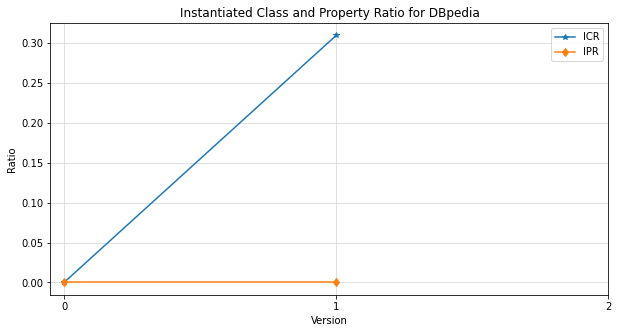

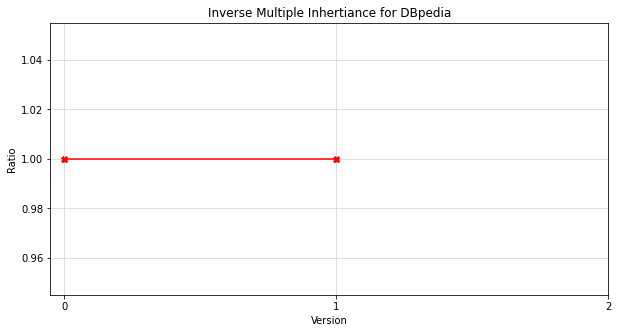

In [24]:
viz.quality_plots(file_path= 'quality.csv')

## Class growth for DBpedia
Here we compare the number of self defined classes and the number of instantiated self defined classes. Self defined classes are non 3rd party classes.

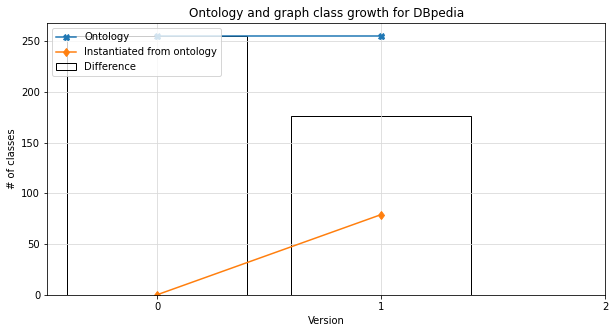

In [29]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.ont_growth(file_path= 'icr.csv', title_name= 'class')

## Property growth for DBpedia
Here we compare the number of self defined properties and the number of instantiated self defined properties. Self defined properties are non 3rd party properties.

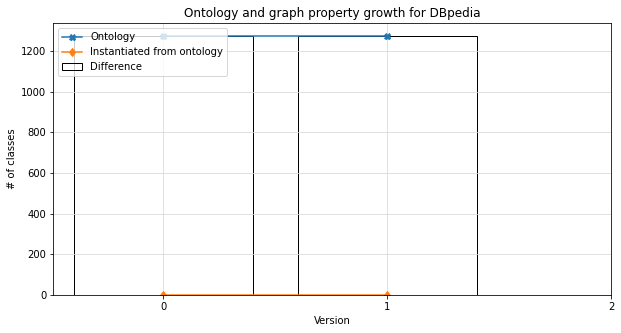

In [30]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.ont_growth(file_path= 'ipr.csv', title_name= 'property')

## Use of external vs. internal classes
Here we compare how many self defined classes and properties are used compared to  the use of classes and properties defined by 3rd parties.

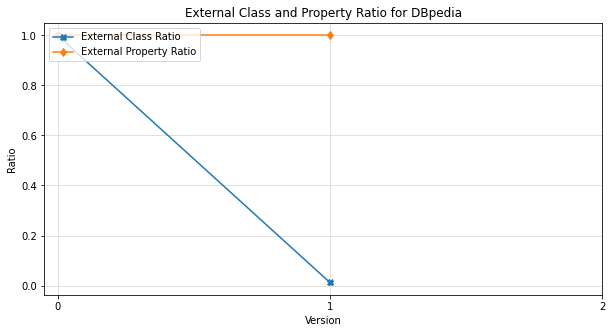

In [31]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.external_ratio(class_path= 'icr.csv', property_path= 'ipr.csv')